In [1]:
# 我们实现 dropout_layer 函数， 该函数以dropout的概率丢弃张量输入X中的元素

In [2]:
import torch
from torch import nn
from d2l import torch as d2l

In [6]:
def dropout_layer(X, dropout):
    assert 0 <= dropout <= 1
    # 在本情况中，所有元素都被丢弃
    if dropout == 1:
        return torch.zeros_like(X)
    # 在本情况中，所有元素都被保留
    if dropout == 0:
        return X
    # 生成一个与输入张量形状相同的掩码 mask
    # 对于掩码中的每个元素：
    # 随机数> dropout 概率，对应的掩码元素为 1；随机数≤ dropout 概率，对应的掩码元素为 0。
    mask = (torch.randn(X.shape) > dropout).float()
    # 被保留的元素*缩放因子 1 / (1 - dropout)，以抵消丢弃的元素所引起的缩放效果
    return mask * X / (1.0 - dropout)

In [7]:
# 测试dropout_layer函数

In [8]:
X= torch.arange(16, dtype = torch.float32).reshape((2, 8))
print(X)
print(dropout_layer(X, 0.))
print(dropout_layer(X, 0.5))
print(dropout_layer(X, 1.))

tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
tensor([[ 0.,  0.,  0.,  0.,  8.,  0.,  0., 14.],
        [ 0., 18.,  0.,  0.,  0.,  0., 28., 30.]])
tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])


In [9]:
# 定义具有两个隐藏层的多层感知机，每个隐藏层包含256个单元

In [10]:
num_inputs, num_outputs, num_hiddens1, num_hiddens2 = 784, 10, 256, 256

In [11]:
# 定义模型

In [12]:
# 我们可以将暂退法应用于每个隐藏层的输出（在激活函数之后）， 并且可以为每一层分别设置暂退概率： 常见的技巧是在靠近输入层的地方设置较低的暂退概率。 
# 下面的模型将第一个和第二个隐藏层的暂退概率分别设置为0.2和0.5， 并且暂退法只在训练期间有效。

In [13]:
dropout1, dropout2 = 0.2, 0.5

In [14]:
class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs, num_hiddens1, num_hiddens2,
                 is_training = True):
        super(Net, self).__init__()
        self.num_inputs = num_inputs
        self.training = is_training
        self.lin1 = nn.Linear(num_inputs, num_hiddens1)
        self.lin2 = nn.Linear(num_hiddens1, num_hiddens2)
        self.lin3 = nn.Linear(num_hiddens2, num_outputs)
        self.relu = nn.ReLU()

    def forward(self, X):
        H1 = self.relu(self.lin1(X.reshape((-1, self.num_inputs))))
        # 只有在训练模型时才使用dropout
        if self.training == True:
            # 在第一个全连接层之后添加一个dropout层
            H1 = dropout_layer(H1, dropout1)
        H2 = self.relu(self.lin2(H1))
        if self.training == True:
            # 在第二个全连接层之后添加一个dropout层
            H2 = dropout_layer(H2, dropout2)
        out = self.lin3(H2)
        return out

In [15]:
net = Net(num_inputs, num_outputs, num_hiddens1, num_hiddens2)

In [16]:
# 训练和测试

In [17]:
# 类似于前面描述的多层感知机训练和测试

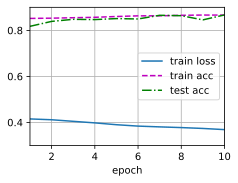

In [19]:
num_epochs, lr, batch_size = 10, 0.5, 256
loss = nn.CrossEntropyLoss(reduction='none')
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

In [20]:
# 简洁实现

In [21]:
net = nn.Sequential(nn.Flatten(),
        nn.Linear(784, 256),
        nn.ReLU(),
        # 在第一个全连接层之后添加一个dropout层
        nn.Dropout(dropout1),
        nn.Linear(256, 256),
        nn.ReLU(),
        # 在第二个全连接层之后添加一个dropout层
        nn.Dropout(dropout2),
        nn.Linear(256, 10))

In [22]:
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

In [23]:
net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Dropout(p=0.2, inplace=False)
  (4): Linear(in_features=256, out_features=256, bias=True)
  (5): ReLU()
  (6): Dropout(p=0.5, inplace=False)
  (7): Linear(in_features=256, out_features=10, bias=True)
)

In [24]:
# 对模型进行训练和测试

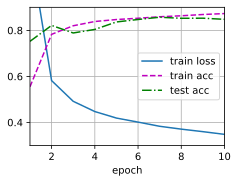

In [25]:
trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)